In [73]:
import numpy as np
import pandas as pd
from difflib import SequenceMatcher
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

In [52]:
# Import results data
df_tri = pd.read_csv('./Results/ZEROSHOT_pred_triples_nocopy_10_Epochs_1_cv.csv')
df_tri_text_no = pd.read_csv('./Results/ZEROSHOT_pred_triples_subtype_objtype_pred_nocopy_10_Epochs_1_cv.csv')
df_tri_text_copy = pd.read_csv('./Results/ZEROSHOT_pred_triples_subtype_objtype_pred_copy_10_Epochs_1_cv.csv')

In [54]:
df_tri = df_tri[['subtype', 'objtype', 'dep', 'y']]
df_tri_text_no = df_tri_text_no[['subtype', 'objtype', 'dep', 'y']]
df_tri_text_copy = df_tri_text_copy[['subtype', 'objtype', 'dep', 'y']]

In [56]:
df_tri_text_copy

,subtype,objtype,dep,y
0,film _PAD_ _PAD_ _PAD_,country _PAD_ _PAD_ _PAD_,_PLACEHOLDER_SUB_ became film _PLACEHOLDER_OBJ_,what _OBJ_TYPE_ does _PLACEHOLDER_SUB_ belong ...
1,film _PAD_ _PAD_ _PAD_,person _PAD_ _PAD_ _PAD_,_PLACEHOLDER_OBJ_ adapted film _PLACEHOLDER_SUB_,what is the _OBJ_TYPE_ of the _SUB_TYPE_ _PLAC...
2,publisher _PAD_,books published,_UNK_DEP_ _PAD_,what is an example of the _PLACEHOLDER_SUB_ ( ...
3,film _PAD_ _PAD_ _PAD_,country _PAD_ _PAD_ _PAD_,_PLACEHOLDER_SUB_ became film _PLACEHOLDER_OBJ_,what _OBJ_TYPE_ of the _SUB_TYPE_ _PLACEHOLDER...
4,composition _PAD_ _PAD_ _PAD_,musical artist _PAD_ _PAD_,_PLACEHOLDER_OBJ_ composition of _PLACEHOLDER_...,what is the name of the _OBJ_TYPE_ that is the...
...,...,...,...,...
13451,album content type,albums _PAD_ _PAD_,_UNK_DEP_ _PAD_ _PAD_,what is the name of a _OBJ_TYPE_ from the _SUB...
13452,composition _PAD_ _PAD_ _PAD_ _PAD_ _PAD_,form _PAD_ _PAD_ _PAD_ _PAD_ _PAD_,_PLACEHOLDER_SUB_ is development of form _PLAC...,what _DEP_VERB_ a _OBJ_TYPE_ from the _SUB_TYP...
13453,written work _PAD_ _PAD_ _PAD_ _PAD_,language _PAD_ _PAD_ _PAD_ _PAD_ _PAD_,_PLACEHOLDER_SUB_ is novel written in _PLACEHO...,what _DEP_VERB_ the _OBJ_TYPE_ of the _SUB_TYP...
13454,film _PAD_ _PAD_ _PAD_,directed by _PAD_ _PAD_,_PLACEHOLDER_OBJ_ adapted film _PLACEHOLDER_SUB_,what _OBJ_TYPE_ is _PLACEHOLDER_SUB_ _END_


In [57]:
# Clean Triple model results

# Clean the triple columns
df_tri["subtype"] = df_tri["subtype"].str.replace("_PAD_","")
df_tri["objtype"] = df_tri["objtype"].str.replace("_PAD_","")
df_tri["dep"] = df_tri["dep"].str.replace("_PLACEHOLDER_SUB_","")
df_tri["dep"] = df_tri["dep"].str.replace("_PLACEHOLDER_OBJ_","")
df_tri["dep"] = df_tri["dep"].str.replace("_UNK_","")
df_tri["dep"] = df_tri["dep"].str.replace("DEP_","")
df_tri["dep"] = df_tri["dep"].str.replace("_PAD_","")

#Fill in question column
df_tri["y"] = df_tri["y"].str.replace("_END_","")
for i in df_tri.index:
    df_tri["y"][i] = df_tri["y"][i].replace("_PLACEHOLDER_SUB_",df_tri["subtype"][i])
    df_tri["y"][i] = df_tri["y"][i].replace("_PLACEHOLDER_OBJ_",df_tri["objtype"][i])

In [58]:
df_tri

,subtype,objtype,dep,y
0,film,country,became film,what is the name of a film that is classified ...
1,film,person,adapted film,what is a game that was released in the film
2,publisher,books published,,what is a film that was shot featured on
3,film,country,became film,what is a type of the drug genre
4,composition,musical artist,composition of,who is an example of a composition episode
...,...,...,...,...
13451,album content type,albums,,what is the name of a album content type game
13452,composition,form,is development of form,what is composition 's a form
13453,written work,language,is novel written in,what is a language that was written in the wri...
13454,film,directed by,adapted film,what is the name of a film release


In [59]:
# Clean Triple Text model results

# Clean the triple columns
df_tri_text_no["subtype"] = df_tri_text_no["subtype"].str.replace("_PAD_","")
df_tri_text_no["objtype"] = df_tri_text_no["objtype"].str.replace("_PAD_","")
df_tri_text_no["dep"] = df_tri_text_no["dep"].str.replace("_PLACEHOLDER_SUB_","")
df_tri_text_no["dep"] = df_tri_text_no["dep"].str.replace("_PLACEHOLDER_OBJ_","")
df_tri_text_no["dep"] = df_tri_text_no["dep"].str.replace("_UNK_","")
df_tri_text_no["dep"] = df_tri_text_no["dep"].str.replace("DEP_","")
df_tri_text_no["dep"] = df_tri_text_no["dep"].str.replace("_PAD_","")

#Fill in question column
df_tri_text_no["y"] = df_tri_text_no["y"].str.replace("_END_","")
for i in df_tri.index:
    df_tri_text_no["y"][i] = df_tri_text_no["y"][i].replace("_PLACEHOLDER_SUB_",df_tri["subtype"][i])
    df_tri_text_no["y"][i] = df_tri_text_no["y"][i].replace("_PLACEHOLDER_OBJ_",df_tri["objtype"][i])

In [60]:
df_tri_text_no

,subtype,objtype,dep,y
0,film,country,became film,what is the name of a film that was created by...
1,film,person,adapted film,what is the name of a film that was created by...
2,publisher,books published,,what is a famous that was the publisher
3,film,country,became film,what is the name of a film
4,composition,musical artist,composition of,what is a song to the composition
...,...,...,...,...
13451,album content type,albums,,what is the name of a album content type
13452,composition,form,is development of form,what is the name of a composition
13453,written work,language,is novel written in,what is a language from the composition writte...
13454,film,directed by,adapted film,what is the name of a film that was created by...


In [67]:
# Clean Triple Text with copy model results

# Clean the triple columns
df_tri_text_copy["subtype"] = df_tri_text_copy["subtype"].str.replace("_PAD_","")
df_tri_text_copy["objtype"] = df_tri_text_copy["objtype"].str.replace("_PAD_","")
df_tri_text_copy["dep"] = df_tri_text_copy["dep"].str.replace("_PLACEHOLDER_SUB_","")
df_tri_text_copy["dep"] = df_tri_text_copy["dep"].str.replace("_PLACEHOLDER_OBJ_","")
df_tri_text_copy["dep"] = df_tri_text_copy["dep"].str.replace("_UNK_","")
df_tri_text_copy["dep"] = df_tri_text_copy["dep"].str.replace("DEP_","")
df_tri_text_copy["dep"] = df_tri_text_copy["dep"].str.replace("_PAD_","")

#Fill in question column
df_tri_text_copy["y"] = df_tri_text_copy["y"].str.replace("_END_","")
for i in df_tri.index:
    df_tri_text_copy["y"][i] = df_tri_text_copy["y"][i].replace("_PLACEHOLDER_SUB_",df_tri["subtype"][i])
    df_tri_text_copy["y"][i] = df_tri_text_copy["y"][i].replace("_PLACEHOLDER_OBJ_",df_tri["objtype"][i])
    df_tri_text_copy["y"][i] = df_tri_text_copy["y"][i].replace("_SUB_TYPE_",df_tri["subtype"][i])
    df_tri_text_copy["y"][i] = df_tri_text_copy["y"][i].replace("_OBJ_TYPE_",df_tri["objtype"][i])
    df_tri_text_copy["y"][i] = df_tri_text_copy["y"][i].replace("_DEP_NOUN_",df_tri["dep"][i])
    df_tri_text_copy["y"][i] = df_tri_text_copy["y"][i].replace("_DEP_VERB_",df_tri["dep"][i])

In [68]:
df_tri_text_copy

,subtype,objtype,dep,y
0,film,country,became film,what country does film belong to
1,film,person,adapted film,what is the person of the film film
2,publisher,books published,,what is an example of the publisher ( publish...
3,film,country,became film,what country of the film film
4,composition,musical artist,composition of,what is the name of the musical artist that ...
...,...,...,...,...
13451,album content type,albums,,what is the name of a albums from the album ...
13452,composition,form,is development of form,what is development of form a form from...
13453,written work,language,is novel written in,what is novel written in the language o...
13454,film,directed by,adapted film,what directed by is film


In [69]:
# Create new df with only questions from three models
df_question = df_tri[['y','dep']]
df_question.rename(columns = {'y':'triple_model'}, inplace = True)
df_question['triple_text_model']=df_tri_text_no['y']
df_question['triple_text_copy_model']=df_tri_text_copy['y']
df_question.drop("dep", axis=1, inplace=True)
df_question

,triple_model,triple_text_model,triple_text_copy_model
0,what is the name of a film that is classified ...,what is the name of a film that was created by...,what country does film belong to
1,what is a game that was released in the film,what is the name of a film that was created by...,what is the person of the film film
2,what is a film that was shot featured on,what is a famous that was the publisher,what is an example of the publisher ( publish...
3,what is a type of the drug genre,what is the name of a film,what country of the film film
4,who is an example of a composition episode,what is a song to the composition,what is the name of the musical artist that ...
...,...,...,...
13451,what is the name of a album content type game,what is the name of a album content type,what is the name of a albums from the album ...
13452,what is composition 's a form,what is the name of a composition,what is development of form a form from...
13453,what is a language that was written in the wri...,what is a language from the composition writte...,what is novel written in the language o...
13454,what is the name of a film release,what is the name of a film that was created by...,what directed by is film


In [71]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

list_tri_no = []
list_tri_copy = []
list_no_copy = []

for i in df_question.index:
    list_tri_no.append(similar(df_question['triple_model'][i], df_question['triple_text_model'][i]))
    list_tri_copy.append(similar(df_question['triple_model'][i], df_question['triple_text_copy_model'][i]))
    list_no_copy.append(similar(df_question['triple_text_model'][i], df_question['triple_text_copy_model'][i]))

df_question['tri_no'] = list_tri_no
df_question['tri_copy'] = list_tri_copy
df_question['no_copy'] = list_no_copy

# Calculate average similarity
list_avg = []
for i in df_question.index:
    avg = (df_question['tri_no'][i] + df_question['tri_copy'][i] + df_question['no_copy'][i])/3
    list_avg.append(avg)

df_question['average'] = list_avg

df_question

,triple_model,triple_text_model,triple_text_copy_model,tri_no,tri_copy,no_copy,average
0,what is the name of a film that is classified ...,what is the name of a film that was created by...,what country does film belong to,0.769231,0.314607,0.301075,0.461638
1,what is a game that was released in the film,what is the name of a film that was created by...,what is the person of the film film,0.705882,0.559140,0.565657,0.610226
2,what is a film that was shot featured on,what is a famous that was the publisher,what is an example of the publisher ( publish...,0.634146,0.473118,0.623656,0.576974
3,what is a type of the drug genre,what is the name of a film,what country of the film film,0.539683,0.472222,0.521739,0.511215
4,who is an example of a composition episode,what is a song to the composition,what is the name of the musical artist that ...,0.626506,0.546875,0.554622,0.576001
...,...,...,...,...,...,...,...
13451,what is the name of a album content type game,what is the name of a album content type,what is the name of a albums from the album ...,0.942529,0.725806,0.689076,0.785804
13452,what is composition 's a form,what is the name of a composition,what is development of form a form from...,0.632911,0.528000,0.467742,0.542884
13453,what is a language that was written in the wri...,what is a language from the composition writte...,what is novel written in the language o...,0.717949,0.575342,0.573427,0.622239
13454,what is the name of a film release,what is the name of a film that was created by...,what directed by is film,0.652174,0.470588,0.523810,0.548857


In [72]:
df_question.describe()

,tri_no,tri_copy,no_copy,average
count,13456.000000,13456.000000,13456.000000,13456.000000
mean,0.623488,0.552872,0.617287,0.597883
std,0.139340,0.130938,0.136896,0.104218
min,0.103093,0.127660,0.195122,0.259652
25%,0.527473,0.467532,0.526316,0.523138
50%,0.629213,0.551020,0.617647,0.592698
75%,0.721311,0.634692,0.710280,0.665709
max,1.000000,1.000000,1.000000,1.000000


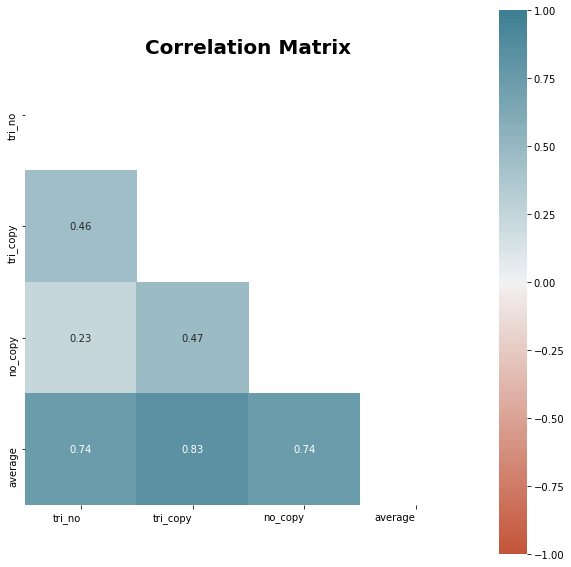

In [158]:
# Correlation matrix 
mask = np.triu(np.ones_like(df_question.corr()))

corr = df_question.corr()
f, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    mask = mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='right'
)
ax.set_title("Correlation Matrix", fontsize = 20, weight='bold');

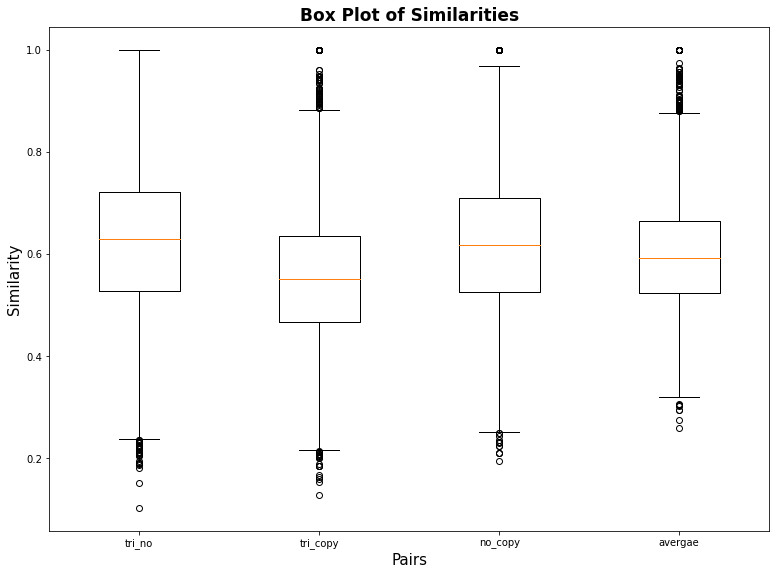

In [99]:
data_1 = df_question['tri_no']
data_2 = df_question['tri_copy']
data_3 = df_question['no_copy']
data_4 = df_question['average']
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['tri_no', 'tri_copy', 'no_copy', 'avergae']
ax.set_xticklabels(labels)
plt.xlabel("Pairs", fontsize = 15)
plt.ylabel("Similarity", fontsize = 15)
plt.title('Box Plot of Similarities', fontsize = 17, weight = "bold")
plt.show();

In [137]:
df_sum = df_question.describe()
df_sum = df_sum.T
df_sum = df_sum.drop(['count', '25%', '75%', 'max'], axis=1)
df_sum = df_sum[['min', 'std', 'mean', '50%']]
df_sum

,min,std,mean,50%
tri_no,0.103093,0.139340,0.623488,0.629213
tri_copy,0.127660,0.130938,0.552872,0.551020
no_copy,0.195122,0.136896,0.617287,0.617647
average,0.259652,0.104218,0.597883,0.592698


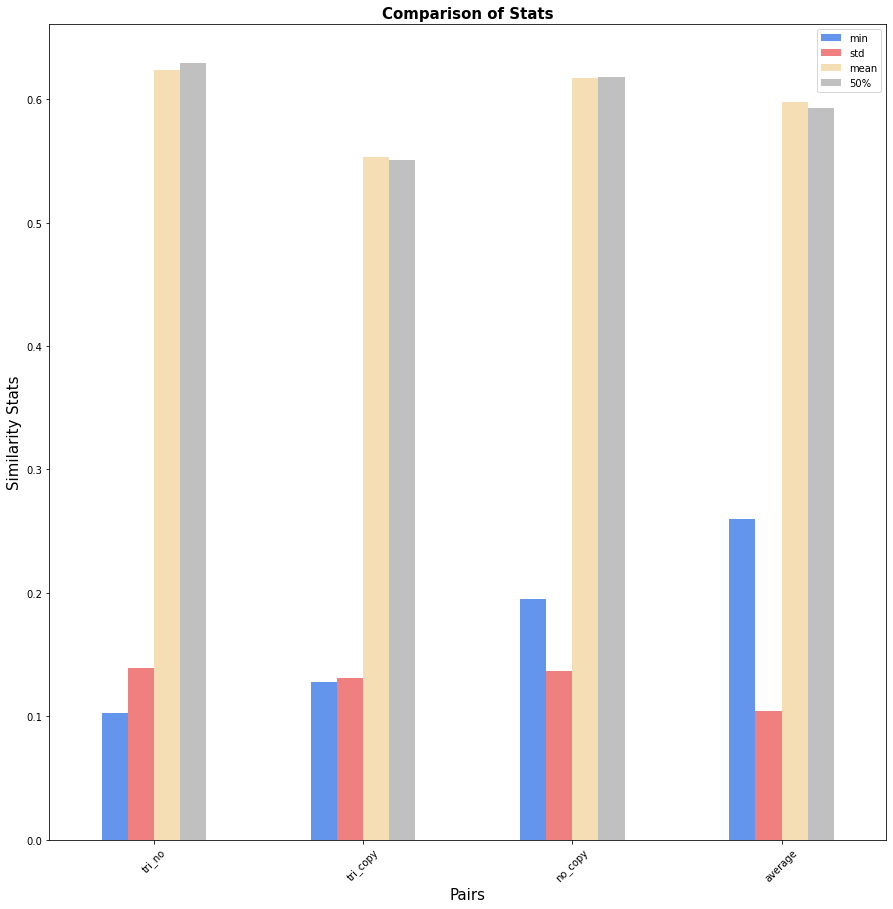

In [157]:
df_sum.plot(kind = 'bar', figsize=(15, 15), color = ['cornflowerblue', 'lightcoral', 'wheat','silver'])
plt.title('Comparison of Stats', fontsize = 15, weight = "bold")
plt.grid(False)
plt.xlabel("Pairs", fontsize = 15)
plt.ylabel('Similarity Stats', fontsize = 15)
plt.xticks(rotation = 45)
plt.show();